 # Solving Poisson Equation
The goal of here is to show how the Poisson equation, can be quickly solved with a few lines of FEniCS code. The most fundamental FEniCS objects such as Mesh,Function,FunctionSpace,TrialFunction, andTestFunction, are introduced focusing on how to write a basic PDE solver,including how to formulate the mathematical variational problem, apply boundaryconditions, call the FEniCS solver, and plot the solution.

Poisson equation can be given by:
\begin{align}
    -\nabla^2 u(x) &= f(x), \quad x \: in \: \Omega, \\
    u(x) &= u_D(x),  \quad x \: in \: \partial \Omega.
\end{align}

Here, $u(x) \in \mathbb{R}^d $ is the unknown function, $x \in \Omega \subset  \mathbb{R}^d$ and $f(x) \in \mathbb{R}^d $ is a prescribed function, $\nabla^2$ is the Laplace operator , $\Omega$ is the spatial domain, and $\partial \Omega$ is the boundary of $\Omega$.

## Fenics Implementation (1D) 
Importing 'dolfin' and 'matplotlib' library. We use functions like UnitIntervalMesh(), FunctionSpace(), Function() etc. from 'dolfin'/'fenics' library. Additionally, 'matplotlib' is used for plotting the results.

In [ ]:
from dolfin import *
import matplotlib.pyplot as plGnocchi mit buntem Gemüse 

Here we select the number of elements ($n$) to solve the problem using FEM and a mesh is created. For this 1D example we use function UnitIntervalMesh() with input as number of elements. This funciton will create a uniform finite element mesh with domain $(0,1)$ having $n$ number elements

In [ ]:
n = 45 # number of elements
mesh = UnitIntervalMesh(n)

Next step is to create function space using function FunctionSpace(). The second argument for this function is to specify the element family such as 'CG' for continous galerkin, 'DG' is for discontinous galerkin. There are other options also to choose from. The third argument tells the degree of shape funcitons for example 'CG' and '1' gives linear continous galerkin shape functions.

In [ ]:
V = FunctionSpace(mesh, 'CG', 1) # FEM space

Next we create shape functions i.e. basis functions $\phi$ , which are linearly combined to express a finite element function $u$. These basis function span the space $V$.
$$u = \sum_{j=1}^N U_j \phi_j $$

In [ ]:
basis = Function(V)
basis.vector()[5] = 1
plot(basis, title='example of basis function')
pl.show()

### Strong formulation for 1D
\begin{align}
-u''(x) &= f(x) \:\:\:\: \textrm{ on } \Omega = (0,1) \\
f(x) &= 5 \\
u(0) &= 0 \\
u'(1) &= 1 
\end{align}


### Weak formulation
We multiply the PDE by a function $v$, integrate the resulting equation over the domain $\Omega$, and perform integration by parts of terms with second-order derivatives. The function $v$ which multiplies the PDE is called a test function $v \in \mathbb{R}^d$. Hence in this case of 1D problem $v \in \mathbb{R}$. The unknown function $u$ to be approximated is referred to as a trial function. We first multiply the Poisson equation by the testfunction $v$ and integrate over $\Omega$:
$$-\int_\Omega u''(x) v(x) dx = \int_\Omega f(x) v(x) dx.$$

We try to keepthe order of the derivatives of $u(x)$ and $v(x)$ as low as possible. Here, we have a second-order spatial derivative of $u(x)$, which can be transformed to a first-derivative of $u(x)$ and $v(x)$ by applying the technique of integration by parts:

$$-\int_\Omega u''(x)v(x) dx = \int_\Omega u'(x) v'(x) dx - u'(x)v(x)\Big{|}_{\partial\Omega} ,$$

Now taking the right hand sides of both the equations:

$$\int_\Omega u'(x) v'(x) dx - u'(x)v(x)\Big{|}_0^1 = \int_\Omega f(x) v(x) dx.$$

Here, $u(0) = 0$ and hence $v(0) = 0$ and $u'(1) = 1$ at the boundary.

$$\int_\Omega u'(x) v'(x) dx  = \int_\Omega f(x) v(x) dx + 1v(1) \:\:\:\:\: \forall v \in V.$$

Bi-Linear form $$a(u,v) = \int_\Omega u'(x) v'(x) dx,$$

and linear form $$L(v) = \int_\Omega f(x) v(x) dx + 1v(1)$$
Solution and test function space : 
\begin{align}
u\in V &=  \{L^2(\Omega)\,|\, u(0) = 0; u'(1) = 1 \},  \\
v \in V &= \{L^2(\Omega)\,|\, v(0) = 0 \}  
\end{align}

In [10]:
# trial and test functions
u = TrialFunction(V)
v = TestFunction(V)

# bilinear form and linear functional
a = inner(grad(u), grad(v))*dx
f = Expression('5', degree=1)
L = f*v*dx + 1*v*ds

Applying Dirichlet boundary condition, $u(0) = 0$. For this purpose we can use predefined fenics function DirichletBC(). First arguments for this function defines the Function space, second argument gives the value of solution at the respective boundary, and third argument defines the boundary points.

In [ ]:
# Define Dirichlet boundary (x = 0)
def left_boundary(x):
    return x[0] < DOLFIN_EPS

bc = DirichletBC(V, Constant(0.0), left_boundary)

We have already used $u$ and $v$ to define bi-linear form $a(u,v)$. Now we re-define u as a Function() object which represents the solution.


In [7]:
u = Function(V)

Finally computing the solution and plotting

In [ ]:
solve(a == L, u, bc)
plot(u, title='solution u')
pl.show()
plot(u.dx(0), title='derivative of solution u')
pl.show()
print('END')

Complete Code all together for 1D solution of Poisson Equation

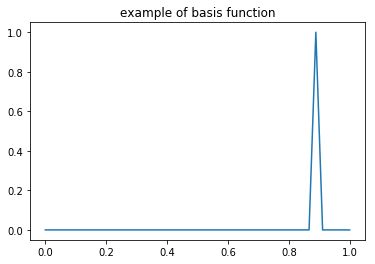

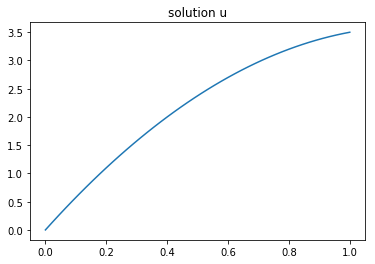

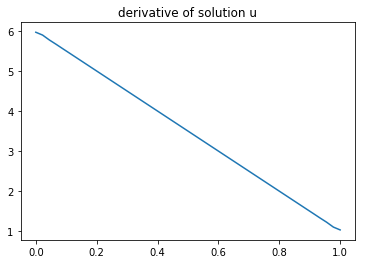

END


In [21]:
"""
fem_1d_A.py

1D example of the finite element method using FEniCS.
"""

from dolfin import *
import matplotlib.pyplot as pl

n = 45 # number of elements
mesh = UnitIntervalMesh(n)

V = FunctionSpace(mesh, 'CG', 1) # FEM space

# example of basis functions
basis = Function(V)
basis.vector()[5] = 1
plot(basis, title='example of basis function')
pl.show()

# trial and test functions
u = TrialFunction(V)
v = TestFunction(V)

# bilinear form and linear functional
a = inner(grad(u), grad(v))*dx
f = Expression('5', degree=0)
L = f*v*dx + 1*v*ds

# Define Dirichlet boundary (x = 0)
def left_boundary(x):
    return x[0] < DOLFIN_EPS

bc = DirichletBC(V, Constant(0.0), left_boundary)

# Compute solution
u = Function(V)
solve(a == L, u, bc)
plot(u, title='solution u')
pl.show()
plot(u.dx(0), title='derivative of solution u')
pl.show()
print('END')

# Variable Coefficient Poisson Formulation

## Strong formulation for 1D
\begin{align}
-k(x)u''(x) &= f(x) \:\:\:\: \textrm{ on } \Omega = (0,1) \\
&f(x) = 5 \\
&u(0) = 0;\: u(1) = 20 \\
&u'(1) = 0
\end{align}

Where $k \in (0,\infty)$ decribes the material property.


## Weak formulation
We multiply the PDE by a function $v$, integrate the resulting equation over the domain $\Omega$, and perform integration by parts of terms with second-order derivatives. We use the material coefficient $k(x)$ in Weak form as shown below. We again first multiply the Poisson equation by the testfunction $v$ and integrate over $\Omega$:
$$-\int_\Omega k(x)u''(x) v(x) dx = \int_\Omega f(x) v(x) dx.$$

We try to keep the order of the derivatives of $u(x)$ and $v(x)$ as low as possible. Here, we have a second-order spatial derivative of $u(x)$, which can be transformed to a first-derivative of $u(x)$ and $v(x)$ by applying the technique of integration by parts:

$$-\int_\Omega k(x)u''(x)v(x) dx = \int_\Omega k(x) u'(x) v'(x) dx - k(x)u'(x)v(x)\Big{|}_{\partial\Omega} ,$$

Now taking the right hand sides of both the equations:

$$\int_\Omega k(x) u'(x) v'(x) dx - k(x)u'(x)v(x)\Big{|}_0^1 = \int_\Omega f(x) v(x) dx.$$

Here, $u(0) = 0$ and hence $v(0) = 0$ and $u'(1) = 0$ at the boundary.

$$\int_\Omega k(x) u'(x) v'(x) dx  = \int_\Omega f(x) v(x) dx \:\:\:\:\: \forall v \in V.$$

Bi-Linear form $$a(u,v) = \int_\Omega k(x) u'(x) v'(x) dx,$$

and linear form $$L(v) = \int_\Omega f(x) v(x) dx$$
Solution and test function space : 
\begin{align}
u\in V &= \{L^2(\Omega)\,|\, u(0) = 0; u(1) = 20; u'(1) = 0 \},  \\
v\in V &= \{L^2(\Omega)\,|\, v(0) = 0; v(1) = 20 \}  
\end{align}

In [19]:
"""
fem_1d_B.py

1D example of the finite element method using FEniCS.
"""

from dolfin import *
import matplotlib.pyplot as pl

n = 45 # number of elements
mesh = UnitIntervalMesh(n)

V = FunctionSpace(mesh, 'CG', 1) # FEM space

# trial and test functions
u = TrialFunction(V)
v = TestFunction(V)

# bilinear form and linear functional
class Material(UserExpression):

    def eval(self, value, x):
        if x<0.5:
            value[0] = 1
        else:
            value[0] = 2

    def value_shape(self):
        return ()


material = Material(degree=1)

a = inner(material*grad(u), grad(v))*dx
f = Expression('0', degree=0)
L = f*v*dx

def left_boundary(x):
    return x[0] < DOLFIN_EPS

def right_boundary(x):
    return x[0] > 1-DOLFIN_EPS

Lbc = DirichletBC(V, Constant(0.0), left_boundary)
Rbc = DirichletBC(V, Constant(20.0), right_boundary)


# Compute solution
u = Function(V)
solve(a == L, u, [Lbc, Rbc])
plot(u, title='solution u')
pl.show()
plot(u.dx(0), title='derivative of solution u')
pl.show()
print('END')

END


## Matrix Assembling
In the following code we will see how to assemble local stiffness matrix to global stiffness matrix, which would be later used to solve the system of equation. The assembling is not direct addition, but it has to be done according to the position of element in the structure that we are analysing.


Depending on the dimention of problem, we can select our mesh accordingly. For example in 1 dimenstion we should use funciton UnitIntervalMesh(N) for N number of elements in each dimention. And for higher dimentions, we change the mesh accordingly. The number of elemnts in case of 1 dimention will be $N$, while in case of 2 dimentional mesh, we get number of elements to be $2N^2$ as we are using triangular element. And finally for 3 dimentional mesh we will have $6N^3$ number of tetrahydral elements.

In [14]:
if dim==1:
    mesh=UnitIntervalMesh(N)
elif dim==2:
    mesh=UnitSquareMesh(N,N)
elif dim==3:
    mesh=UnitCubeMesh(N,N,N)

In next Step we define the basis functions. The basis function in case of 2D can be visualized using the following piece of code:

In [ ]:
V=FunctionSpace(mesh,'CG',pol_order)
basis = Function(V)
basis.vector()[12] = 1
plot(basis, title='example of basis function')
pl.show()

To get the global stiffness matrix for our variation problem, we use the function assemble() and pass bilinear form "Aform" into this function. This can be seen in the following code, where variable "Amat" is the global stiffness matrix. We can check the dimentions of our global stifness matrix using "Amat.shape" in python.

In [ ]:
u=TrialFunction(V)
v=TestFunction(V)
Aform=inner(grad(u),grad(v))*dx

Amat = assemble(Aform).array()
print('shape of global system matrix', Amat.shape)

Next we are computing global system matrix using cell vertices and coordinates of DOF's. We get local stiffness matrix using the in-built FeNics function assemble_local(), by passing bi-linear term and corresponding cell. To get the coordinates associated with all degrees of freedom, we need to   return the coordinates and dofs associated with each element (cell) using element() and dofmap() object of a FunctionSpace. The following code illustrates how to iterate over all elements of a mesh and print the local cell details associated with the element.

In [ ]:
## local assembling
Amat2 = np.zeros([V.dim(), V.dim()])
for cell in cells(mesh):
    print('-- element no. = {}'.format(cell.index()))
    Aloc = assemble_local(Aform, cell)
    local_to_global_map = V.dofmap().cell_dofs(cell.index())
    Amat2[np.ix_(local_to_global_map,local_to_global_map)] += Aloc
    print('cell vertices:\n', np.array(cell.get_vertex_coordinates()).reshape(-1,2))
    print('coordinates of DOFs:\n',V.element().tabulate_dof_coordinates(cell))
    print('local system matrix:\n',Aloc)
    print('indices in the global system matrix:',local_to_global_map)

print('=======================================')
print('norm of difference between matrices = {}'.format(np.linalg.norm(Amat-Amat2)))
print(Amat)
print('end')

Overall Code can be seen as:

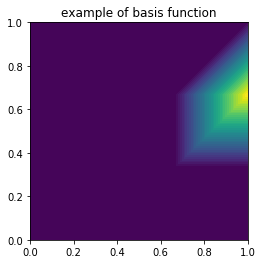

shape of global system matrix (16, 16)
-- element no. = 0
cell vertices:
 [[ 0.          0.        ]
 [ 0.33333333  0.        ]
 [ 0.33333333  0.33333333]]
coordinates of DOFs:
 [[ 0.          0.        ]
 [ 0.33333333  0.        ]
 [ 0.33333333  0.33333333]]
local system matrix:
 [[ 0.5 -0.5  0. ]
 [-0.5  1.  -0.5]
 [ 0.  -0.5  0.5]]
indices in the global system matrix: [ 6 10  7]
-- element no. = 1
cell vertices:
 [[ 0.          0.        ]
 [ 0.          0.33333333]
 [ 0.33333333  0.33333333]]
coordinates of DOFs:
 [[ 0.          0.        ]
 [ 0.          0.33333333]
 [ 0.33333333  0.33333333]]
local system matrix:
 [[ 0.5 -0.5  0. ]
 [-0.5  1.  -0.5]
 [ 0.  -0.5  0.5]]
indices in the global system matrix: [6 3 7]
-- element no. = 2
cell vertices:
 [[ 0.33333333  0.        ]
 [ 0.66666667  0.        ]
 [ 0.66666667  0.33333333]]
coordinates of DOFs:
 [[ 0.33333333  0.        ]
 [ 0.66666667  0.        ]
 [ 0.66666667  0.33333333]]
local system matrix:
 [[ 0.5 -0.5  0. ]
 [-0.5  1. 

In [19]:
"""
fem_assemble_local2global.py

This script shows how the system matrix is assembled from the local system matrices.
"""

from __future__ import print_function
from dolfin import *
import numpy as np
import matplotlib.pyplot as pl


dim=2 # dimension of the problem
N=3 # number of elements
pol_order=1 # polynomial order

if dim==1:
    mesh=UnitIntervalMesh(N)
elif dim==2:
    mesh=UnitSquareMesh(N,N)
eli,f dim==3:
    mesh=UnitCubeMesh(N,N,N)

V=FunctionSpace(mesh,'CG',pol_order)
basis = Function(V)
basis.vector()[12] = 1
plot(basis, title='example of basis function')
pl.show()
# A = Expression('x[0]*x[1]', degree=2)
# A = Expression('1', degree=0)

u=TrialFunction(V)
v=TestFunction(V)
Aform=inner(grad(u),grad(v))*dx

Amat = assemble(Aform).array()
print('shape of global system matrix', Amat.shape)

## local assembling
Amat2 = np.zeros([V.dim(), V.dim()])
for cell in cells(mesh):
    print('-- element no. = {}'.format(cell.index()))
    Aloc = assemble_local(Aform, cell)
    local_to_global_map = V.dofmap().cell_dofs(cell.index())
    Amat2[np.ix_(local_to_global_map,local_to_global_map)] += Aloc
    print('cell vertices:\n', np.array(cell.get_vertex_coordinates()).reshape(-1,2))
    print('coordinates of DOFs:\n',V.element().tabulate_dof_coordinates(cell))
    print('local system matrix:\n',Aloc)
    print('indices in the global system matrix:',local_to_global_map)

print('=======================================')
print('norm of difference between matrices = {}'.format(np.linalg.norm(Amat-Amat2)))
print(Amat)
print('end')

In this code, we solve the system with Dirichlet boundary condition. We again define the mesh, test, trial funcitons and bilinear as we have seen already. Also we define boundary condition as $u(0) = u(1) = 0$.

\begin{align}
-u''(x) &= f(x) \:\:\:\: \textrm{ on } \Omega = (0,1) \\
f(x) &= x(1-x) \\
u(0) &= 0 \\
u(1) &= 0 
\end{align}

In [30]:
from dolfin import *
import numpy as np


n = 5 # number of elements
dim=1
if dim==1:
    mesh = UnitIntervalMesh(n)

V = FunctionSpace(mesh, 'CG', 1) # FEM space

# trial and test functions
u = TrialFunction(V)
v = TestFunction(V)

# bilinear form and linear functional
a = u*v*dx
f = Expression('x[0]*(1-x[0])', degree=2)
L = f*v*dx

# Define Dirichlet boundary (x = 0)
def boundary(x):
    return x[0] < DOLFIN_EPS or x[0]>1-DOLFIN_EPS

bc = DirichletBC(V, Constant(0.0), boundary)

Next we compute the solution of system for $u$ using equation $au = L$. Here, "a" is bilinear form and "L" is right hand side representing dirichelet BC.

In [ ]:
# bilinear form and linear functional
a = u*v*dx
f = Expression('x[0]*(1-x[0])', degree=2)
L = f*v*dx

# Compute solution
u = Function(V)
solve(a == L, u, bc)

Now we solve the system for active degree of freedom and comare that solution ($u_2$) with the solution we got above ($u$). In order to ensure the correct type of assembled matrix, we can use tensor argument in "assemble()" function.

In [ ]:
# assembling a system matrix
A = EigenMatrix()
A = assemble(a, tensor=A)

b=assemble(L)

bcinds = list(bc.get_boundary_values().keys()) # indices of boundary
print(bcinds)
uD=np.array(list(bc.get_boundary_values().values())) # the values on boundary
print(uD)

adof = np.setdiff1d(np.arange(V.dim(), dtype=np.int32),
                              bcinds).astype(np.int32) # active DOFs

# submatrices corresponding to active DOFs and to BC
A_PP = A.array()[adof, :][:, adof]
A_PD = A.array()[adof, :][:, bcinds]
A_DD = A.array()[bcinds, :][:, bcinds]
print(A.array())
print(A_PP)

# finding the solution
u2 = np.zeros(V.dim()) # preallocationg
u2[bcinds] = uD # setting the values on Dirichlet boundary
u2[adof] = np.linalg.solve(A_PP, b[adof]-A_PD.dot(uD)) # solving the system for active DOFs

# checking the solution
print('norm(u-u2) =',np.linalg.norm(u2-u.vector()))
print('END')

Overall Code can be seen as:

In [33]:
"""
fem_DBC.py

This script assembles the system matrix and
solves that system for a general nonhomogeneous Dirichlet boundary conditions.
"""

from dolfin import *
import numpy as np


n = 5 # number of elements
dim=1
if dim==1:
    mesh = UnitIntervalMesh(n)

V = FunctionSpace(mesh, 'CG', 1) # FEM space

# trial and test functions
u = TrialFunction(V)
v = TestFunction(V)

# bilinear form and linear functional
a = u*v*dx
f = Expression('x[0]*(1-x[0])', degree=2)
L = f*v*dx

# Define Dirichlet boundary (x = 0)
def boundary(x):
    return x[0] < DOLFIN_EPS or x[0]>1-DOLFIN_EPS

bc = DirichletBC(V, Constant(0.0), boundary)

# Compute solution
u = Function(V)
solve(a == L, u, bc)
b=assemble(L)

# assembling a system matrix
A = EigenMatrix()
A = assemble(a, tensor=A)

bcinds = list(bc.get_boundary_values().keys()) # indices of boundary
print(bcinds)
uD=np.array(list(bc.get_boundary_values().values())) # the values on boundary
print(uD)

adof = np.setdiff1d(np.arange(V.dim(), dtype=np.int32),
                              bcinds).astype(np.int32) # active DOFs

# submatrices corresponding to active DOFs and to BC
A_PP = A.array()[adof, :][:, adof]
A_PD = A.array()[adof, :][:, bcinds]
A_DD = A.array()[bcinds, :][:, bcinds]
print(A.array())
print(A_PP)

# finding the solution
u2 = np.zeros(V.dim()) # preallocationg
u2[bcinds] = uD # setting the values on Dirichlet boundary
u2[adof] = np.linalg.solve(A_PP, b[adof]-A_PD.dot(uD)) # solving the system for active DOFs

# checking the solution
print('norm(u-u2) =',np.linalg.norm(u2-u.vector()))
print('END')

[0, 5]
[ 0.  0.]
[[ 0.06666667  0.03333333  0.          0.          0.          0.        ]
 [ 0.03333333  0.13333333  0.03333333  0.          0.          0.        ]
 [ 0.          0.03333333  0.13333333  0.03333333  0.          0.        ]
 [ 0.          0.          0.03333333  0.13333333  0.03333333  0.        ]
 [ 0.          0.          0.          0.03333333  0.13333333  0.03333333]
 [ 0.          0.          0.          0.          0.03333333  0.06666667]]
[[ 0.13333333  0.03333333  0.          0.        ]
 [ 0.03333333  0.13333333  0.03333333  0.        ]
 [ 0.          0.03333333  0.13333333  0.03333333]
 [ 0.          0.          0.03333333  0.13333333]]
norm(u-u2) = 4.80740671596e-17
END


## Linear lagrange basis functions. 
Linear combinations of Lagrange basis functions could construct Lagrange interpolating polynomials. Lagrange basis functions are usually used in FE analysis as the basis for the element shape-functions. We can visualise these shape functions in FeNics. "CG" (Continuous Galerkin) in argument in FunctionSpace() implies the standard Lagrange family of elements. Instead "Lagrange" can also be used as argument for the same

In [55]:
V=FunctionSpace(mesh, 'CG', 1)
f=Function(V)

To visualise, we make one element of unit value and rest as zero. 

In [53]:
f.vector()[17]=1
print(f.vector().get_local())
plot(f)
pl.show()
print('END')

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


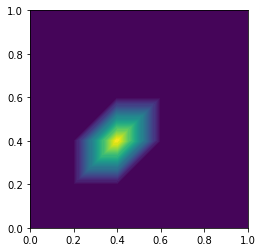

END


In [52]:
"""
FEM_functions.py

This script visualise a linear Lagrange basis function.
"""

import numpy as np
from dolfin import *
import matplotlib.pyplot as pl

n=5
mesh=UnitSquareMesh(n,n)
V=FunctionSpace(mesh, 'CG', 1)
# V=FunctionSpace(mesh, 'Lagrange', 1)
f=Function(V)
f.vector()[17]=1
print(f.vector().get_local())
plot(f)
pl.show()
print('END')

## Numerical Integration Points
In this part, we can visualise the location of the integration points of an element by using numnerical integration. Two cases have been cosidered here, first case shows the points for triangular elements. Suppose that we need to integrate 4 degree polynomial exactly using numerical integration, the number of points in this case would be 6. Second case is for the square element. In this case the number of points we have is 9.


We use function create_quadrature() that generates points and weights for given element shape (cell) and polynomial order.


= triangle ========
points=[[ 0.81684757  0.09157621]
 [ 0.09157621  0.81684757]
 [ 0.09157621  0.09157621]
 [ 0.10810302  0.44594849]
 [ 0.44594849  0.10810302]
 [ 0.44594849  0.44594849]]
weights=[ 0.05497587  0.05497587  0.05497587  0.11169079  0.11169079  0.11169079]
= quadrilateral ========
points=[[ 0.11270167  0.11270167]
 [ 0.11270167  0.5       ]
 [ 0.11270167  0.88729833]
 [ 0.5         0.11270167]
 [ 0.5         0.5       ]
 [ 0.5         0.88729833]
 [ 0.88729833  0.11270167]
 [ 0.88729833  0.5       ]
 [ 0.88729833  0.88729833]]
weights=[ 0.07716049  0.12345679  0.07716049  0.12345679  0.19753086  0.12345679
  0.07716049  0.12345679  0.07716049]


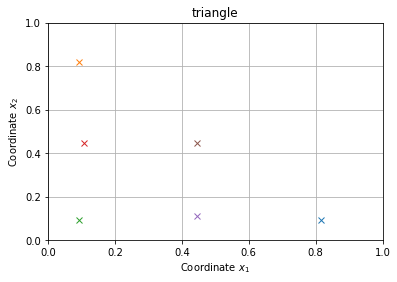

In [58]:
"""
numerical_integration.py

This script visualises numerical integration points
on a reference triangle and a square.
"""

from ffc.fiatinterface import create_quadrature

cells=['triangle','quadrilateral']
degree=4 # the degree of polynomial that is integrated exactly

for cell in cells:

    ip, iw=create_quadrature(cell, degree=degree)
    print("= {} ========".format(cell))
    print("points={}".format(ip))
    print("weights={}".format(iw))
    import matplotlib.pyplot as pl
    pl.figure()
    pl.title(cell)
    for ip0 in ip:
        pl.plot(ip0[0], ip0[1], 'x')
    pl.xlim([0,1])
    pl.ylim([0,1])
    pl.grid()
    pl.xlabel('Coordinate $x_1$')
    pl.ylabel('Coordinate $x_2$')
pl.show()